In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd 
import numpy as np
from utils.main_utils import autolabel_bar,bin_rate,categorical_rate

In [2]:
df = pd.read_csv("train.csv")
df.columns = [c.lower() for c in df.columns]

# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
print(f'count passengerid:{df.passengerid.count()}')
print(f'count unique passengerid:{len(df.passengerid.unique())}')

count passengerid:891
count unique passengerid:891


In [6]:
s = df[df.survived > 0]
ns = df[df.survived <= 0]
print(f'survived: {len(s)} not-survived:{len(ns)}')

rate = df.survived.sum()/df.passengerid.count()
print(f'survived rate:{round(rate,2)}')

survived: 342 not-survived:549
survived rate:0.38


In [7]:
for c in df.columns:
    null=df[c].isnull().sum()
    if null>0:
        print(f'{c} have {null} null values')

age have 177 null values
cabin have 687 null values
embarked have 2 null values


In [8]:
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [34]:
dfm=df.copy()

## --- Sex

In [35]:
gbsex = group_by_with_main_metrics(dfm,'sex','passengerid','survived')
gbsex

,sex,passengerid,survived,share,target_rate
0,female,314,233,0.352413,0.742038
1,male,577,109,0.647587,0.188908


## --- Age

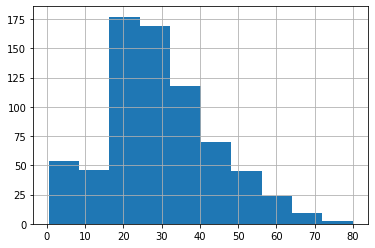

In [36]:
df.age.hist()

In [37]:
from utils.main_utils import group_by_with_main_metrics
dfm['bage'] = pd.qcut(df.age,6,duplicates='drop')
gbbage = group_by_with_main_metrics(dfm,'bage','passengerid','survived')
gbbage

,bage,passengerid,survived,share,target_rate
0,"(0.419, 18.0]",139,70,0.194678,0.503597
1,"(18.0, 23.0]",107,33,0.149860,0.308411
2,"(23.0, 28.0]",116,45,0.162465,0.387931
3,"(28.0, 34.0]",116,48,0.162465,0.413793
4,"(34.0, 44.0]",121,51,0.169468,0.421488
5,"(44.0, 80.0]",115,43,0.161064,0.373913


[Text(0, 0, '(0.419, 18.0]'),
 Text(0, 0, '(18.0, 23.0]'),
 Text(0, 0, '(23.0, 28.0]'),
 Text(0, 0, '(28.0, 34.0]'),
 Text(0, 0, '(34.0, 44.0]')]

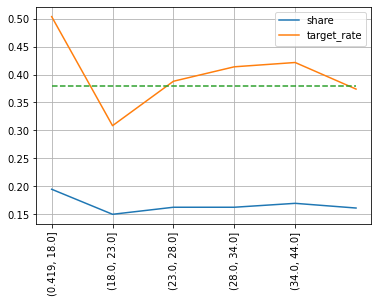

In [38]:
ax = gbbage.plot(y=['share','target_rate'], grid=True,rot=90)
tot_ticks=len(gbbage['bage'])-1
ax.plot([0,tot_ticks],[0.38,0.38],'--')
ax.set_xticks(np.arange(tot_ticks))
ax.set_xticklabels(gbbage.bage)

Text(0.5, 1.0, 'Not survived')

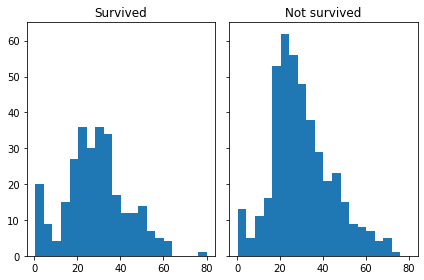

In [39]:
n_bins = 20

# Generate a normal distribution, center at x=0 and y=5
s_age = s.age[s.age.notnull()].astype(int)
ns_age = ns.age[ns.age.notnull()].astype(int)

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
rge = (df.age.min(), df.age.max())

axs[0].hist(s_age, bins=n_bins, range=rge)
axs[0].set_title("Survived")

axs[1].hist(ns_age, bins=n_bins, range=rge)
axs[1].set_title("Not survived")

[Text(0, 0, '(0.419, 18.0]'),
 Text(0, 0, '(18.0, 23.0]'),
 Text(0, 0, '(23.0, 28.0]'),
 Text(0, 0, '(28.0, 34.0]'),
 Text(0, 0, '(34.0, 44.0]'),
 Text(0, 0, '(44.0, 80.0]')]

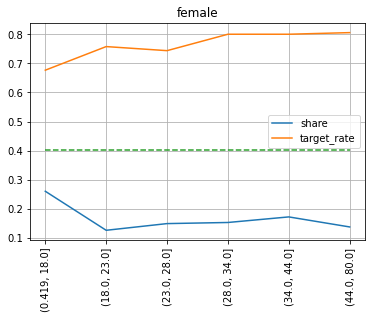

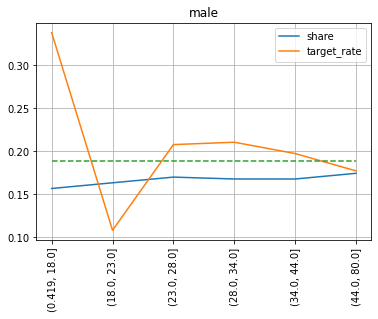

In [40]:
dfm['bage'] = pd.qcut(df.age,6,duplicates='drop')
gbbagef = group_by_with_main_metrics(dfm[dfm.sex=='female'],'bage','passengerid','survived')
ax1 = gbbagef.plot(y=['share','target_rate'], grid=True,rot=90,title='female')
tot_ticks=len(gbbagef['bage'])
mean = dfm[dfm.sex=='female'].survived.sum()/len(dfm[dfm.sex!='female'])
ax1.plot([0,tot_ticks-1],[mean,mean],'--')
ax1.set_xticks(np.arange(tot_ticks))
ax1.set_xticklabels(gbbage.bage)

gbbagem = group_by_with_main_metrics(dfm[dfm.sex!='female'],'bage','passengerid','survived')
ax2 = gbbagem.plot(y=['share','target_rate'], grid=True,rot=90,title='male')
tot_ticks=len(gbbagem['bage'])
mean = dfm[dfm.sex!='female'].survived.sum()/len(dfm[dfm.sex!='female'])
ax2.plot([0,tot_ticks-1],[mean,mean],'--')
ax2.set_xticks(np.arange(tot_ticks))
ax2.set_xticklabels(gbbage.bage)

In [41]:
#age_bins = [-2,0,5,10,15,25,30,35,40,45,55,80]
age_bins = [-2,13,25,40,80]
dfm.age = dfm.age.fillna(dfm.age.mean()) 

age_rate_male = bin_rate(dfm.age[dfm.sex=='male'],
                    dfm.survived > 0, 
                    20, 
                    age_bins)
age_rate_male

,total_bins_count,true_bins_count,rate
"(-2, 13]",37,21,0.567568
"(13, 25]",142,16,0.112676
"(25, 40]",296,54,0.182432
"(40, 80]",102,18,0.176471


In [43]:
age_rate_female = bin_rate(dfm.age[dfm.sex=='female'],
                    dfm.survived > 0, 
                    20, 
                    age_bins)
age_rate_female

,total_bins_count,true_bins_count,rate
"(-2, 13]",34,21,0.617647
"(13, 25]",88,66,0.750000
"(25, 40]",144,109,0.756944
"(40, 80]",48,37,0.770833


In [31]:
bins = [str(age_interval) for age_interval in age_rate_male.index]
age_rate_male.rate = age_rate_male.rate.round(2)
age_rate_female.rate = age_rate_female.rate.round(2)

x = np.arange(len(bins))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5))

rects1 = ax.bar(x-width/2, age_rate_male.rate, width, label='Men')
rects2 = ax.bar(x+width/2, age_rate_female.rate, width, label='Women')

ax.set_ylabel('Survival probability')
ax.set_title('Age buckets')
ax.set_xticks(x)
ax.set_xticklabels(bins, rotation=45)
ax.legend()
        
autolabel_bar(ax, rects1)
autolabel_bar(ax, rects2)

fig.tight_layout()
plt.show()

NameError: name 'age_rate_male' is not defined

## --- Fare

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4ea846ae80>]],
      dtype=object)

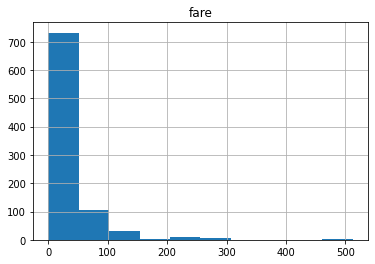

In [33]:
dfm[['fare']].hist()

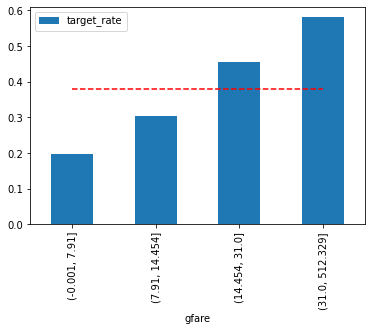

In [53]:
dfm['gfare'] = pd.qcut(dfm.fare,4,duplicates='drop')
gbfare = group_by_with_main_metrics(dfm,'gfare','passengerid','survived')
ax = gbfare.plot.bar(x='gfare',y='target_rate')
ax.plot([0,len(gbfare.gfare)-1],[0.38,0.38],'--',color='red')

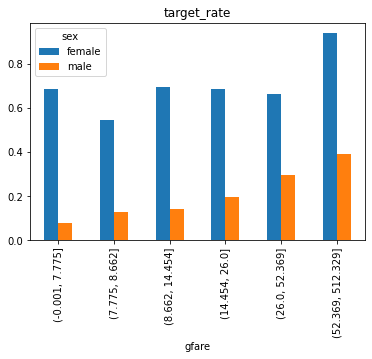

In [54]:
dfm['gfare'] = pd.qcut(dfm.fare,6,duplicates='drop')
gbfare = group_by_with_main_metrics(dfm,['gfare','sex'],'passengerid','survived')
pv = gbfare.pivot_table(values='target_rate',index='gfare',columns=['sex'],aggfunc=np.sum)
pv.plot.bar(title='target_rate')

In [59]:
#fare_bins = [-2,0,7.5,8,8.5,9,10,15,20,30,40,60,80,100,600]
fare_bins = [-2,10,60,600]
fare_rates = bin_rate(var=dfm.fare, 
                      target=dfm.survived > 0,
                      bins=fare_bins)
fare_rates

,total_bins_count,true_bins_count,rate
"(-2, 10]",336,67,0.199405
"(10, 60]",433,193,0.445727
"(60, 600]",122,82,0.672131


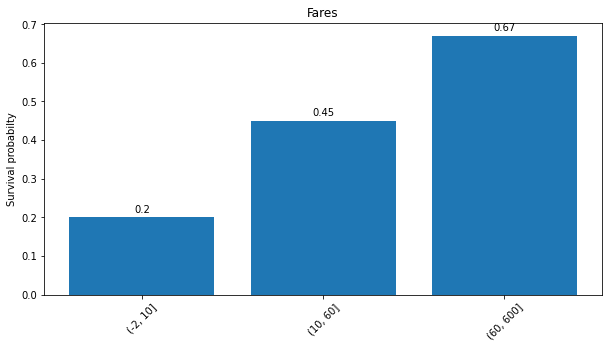

In [60]:
fare_rates.rate = fare_rates.rate.round(2)
fig,ax = plt.subplots(figsize=(10,5))
x = np.arange(len(fare_rates.index))
width = 0.35

rects = ax.bar(x, fare_rates.rate)
ax.set_title("Fares")
ax.set_ylabel("Survival probabilty")
ax.set_xticks(x)
ax.set_xticklabels(fare_rates.index, rotation=45)
autolabel_bar(ax, rects)


## -- Parch (parents - children)

In [46]:
dfm['gparch'] = dfm.parch
dfm.loc[dfm.gparch >= 2, 'gparch'] = 2
group_by_with_main_metrics(dfm,'gparch','passengerid','survived')

,gparch,passengerid,survived,share,target_rate
0,0,678,233,0.760943,0.343658
1,1,118,65,0.132435,0.550847
2,2,95,44,0.106622,0.463158


## -- Sibsp (siblings - spouses)

In [16]:
df = train_df.copy()
df.loc[df.sibsp >= 3 , 'sibsp'] = 3
categorical_rate(df.sibsp, train_df.survived > 0)

,total_cat_count,true_cat_count,rate
0,608,210,0.345395
1,209,112,0.535885
2,28,13,0.464286
3,46,7,0.152174


## -- Embarked

In [17]:
categorical_rate(train_df.embarked,train_df.survived > 0)

,total_cat_count,true_cat_count,rate
C,168,93,0.553571
Q,77,30,0.389610
S,644,217,0.336957


## -- Ticket

In [99]:
dfm['ticket_info']='is_number'
dfm.loc[dfm.ticket.str.match("^\d+$")==False,'ticket_info'] = dfm[dfm.ticket.str.match("^\d+$")==False].ticket.str.split(" ",expand=True)[0]
dfm[['ticket_info','ticket']]

,ticket_info,ticket
0,A/5,A/5 21171
1,PC,PC 17599
2,STON/O2.,STON/O2. 3101282
3,is_number,113803
4,is_number,373450
...,...,...
886,is_number,211536
887,is_number,112053
888,W./C.,W./C. 6607
889,is_number,111369


In [108]:
list(dfm[dfm.ticket.str.match("^\d+$")==False].ticket)

['A/5 21171',
 'PC 17599',
 'STON/O2. 3101282',
 'PP 9549',
 'A/5. 2151',
 'PC 17601',
 'PC 17569',
 'C.A. 24579',
 'PC 17604',
 'A./5. 2152',
 'SC/Paris 2123',
 'S.C./A.4. 23567',
 'A/4. 39886',
 'PC 17572',
 'C.A. 31026',
 'C.A. 34651',
 'CA 2144',
 'PC 17605',
 'C.A. 29395',
 'S.P. 3464',
 'C.A. 33111',
 'CA 2144',
 'S.O.C. 14879',
 'SO/C 14885',
 'W./C. 6608',
 'SOTON/OQ 392086',
 'W.E.P. 5734',
 'C.A. 2315',
 'PC 17754',
 'PC 17759',
 'STON/O 2. 3101294',
 'PC 17558',
 'S.O.C. 14879',
 'A4. 54510',
 'C 17369',
 'SOTON/O.Q. 3101307',
 'A/5. 3337',
 'C.A. 29178',
 'SC/PARIS 2133',
 'PC 17593',
 'STON/O2. 3101279',
 'C.A. 33112',
 'W./C. 6608',
 'S.O.P. 1166',
 'A.5. 11206',
 'A/5. 851',
 'Fa 265302',
 'PC 17597',
 'SOTON/OQ 392090',
 'CA. 2343',
 'C.A. 33595',
 'PC 17318',
 'STON/O 2. 3101280',
 'PC 17595',
 'LINE',
 'CA. 2343',
 'SC/PARIS 2131',
 'PC 17610',
 'PC 17569',
 'CA. 2343',
 'A/5 3540',
 'SOTON/O.Q. 3101311',
 'F.C.C. 13528',
 'A/5 21174',
 'STON/O2. 3101283',
 'W/C 14208

In [98]:
dfm.ticket_info = dfm.ticket_info.str.replace('.','')
dfm.ticket_info = dfm.ticket_info.str.replace('/','')
gbticket = group_by_with_main_metrics(dfm,'ticket_info','passengerid','survived')
gbticket

,ticket_info,passengerid,survived,share,target_rate
0,is_number,661,254,0.741863,0.384266
1,not_number,230,88,0.258137,0.382609


## -- cabin

In [106]:
dfm['deck'] = dfm.cabin.str[0]
gbdeck = group_by_with_main_metrics(dfm,'deck','passengerid','survived')
gbdeck

# d - f -> 2da class

,deck,passengerid,survived,share,target_rate
0,A,15,7,0.073529,0.466667
1,B,47,35,0.230392,0.744681
2,C,59,35,0.289216,0.593220
3,D,33,25,0.161765,0.757576
4,E,32,24,0.156863,0.750000
5,F,13,8,0.063725,0.615385
6,G,4,2,0.019608,0.500000
7,T,1,0,0.004902,0.000000


# Training

In [76]:
def titanic_preprocess(df):
    df.fare = df.fare.fillna(df.fare.mean())
    df.fare = pd.cut(df.fare, bins=fare_bins)
    df.age = df.age.fillna(df.age.mean())
    df.age = pd.cut(df.age, bins=age_bins)
    df.sex = df.sex=='male'
    df.loc[df.sibsp >= 2, 'sibsp'] = 2
    df.loc[df.parch >= 2, 'parch'] = 2
    df.loc[df.embarked.isnull(),'embarked'] = 'S'
    
    raw_df = df[['age','sex','fare','pclass','parch','sibsp','embarked']].to_numpy()
    return raw_df

In [77]:
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder

train_filter = dfm.survived.notnull()
y_train = dfm.survived[train_filter].astype(int).to_numpy()

raw_x_train = titanic_preprocess(dfm.copy())
ohe = OneHotEncoder().fit(raw_x_train)
x_train = ohe.transform(raw_x_train)
#bin_discretizer = KBinsDiscretizer([2,10,20], encode='onehot').fit(raw_x_train)
#x_train = bin_discretizer.transform(raw_x_train)

In [78]:
raw_x_train[:,2].reshape(891,1)

array([[Interval(-2, 10, closed='right')],
       [Interval(60, 600, closed='right')],
       [Interval(-2, 10, closed='right')],
       [Interval(10, 60, closed='right')],
       [Interval(-2, 10, closed='right')],
       [Interval(-2, 10, closed='right')],
       [Interval(10, 60, closed='right')],
       [Interval(10, 60, closed='right')],
       [Interval(10, 60, closed='right')],
       [Interval(10, 60, closed='right')],
       [Interval(10, 60, closed='right')],
       [Interval(10, 60, closed='right')],
       [Interval(-2, 10, closed='right')],
       [Interval(10, 60, closed='right')],
       [Interval(-2, 10, closed='right')],
       [Interval(10, 60, closed='right')],
       [Interval(10, 60, closed='right')],
       [Interval(10, 60, closed='right')],
       [Interval(10, 60, closed='right')],
       [Interval(-2, 10, closed='right')],
       [Interval(10, 60, closed='right')],
       [Interval(10, 60, closed='right')],
       [Interval(-2, 10, closed='right')],
       [In

In [79]:
x_train.toarray()[:3]

array([[0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
        1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
        1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
        0., 0., 0., 0., 1.]])

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.33, random_state=42)


In [84]:
X_train,Y_train = x_train,y_train

In [85]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train,Y_train)
lr.score(X_train,Y_train)

0.8069584736251403

In [86]:
lr.score(X_test,Y_test)

0.8169491525423729

In [69]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

In [70]:
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
#model.add(Dense(20, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [71]:
#sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [72]:
# fit the keras model on the dataset
model.fit(X_train, Y_train, epochs=10, batch_size=10)

Epoch 1/10
891/891 [==============================] - 0s 240us/step - loss: 0.6490 - accuracy: 0.6521
Epoch 2/10
891/891 [==============================] - 0s 100us/step - loss: 0.5750 - accuracy: 0.7284
Epoch 3/10
891/891 [==============================] - 0s 101us/step - loss: 0.5063 - accuracy: 0.7677
Epoch 4/10
891/891 [==============================] - 0s 107us/step - loss: 0.4658 - accuracy: 0.7912
Epoch 5/10
891/891 [==============================] - 0s 104us/step - loss: 0.4447 - accuracy: 0.8013
Epoch 6/10
891/891 [==============================] - 0s 106us/step - loss: 0.4348 - accuracy: 0.8103
Epoch 7/10
891/891 [==============================] - 0s 101us/step - loss: 0.4282 - accuracy: 0.8215
Epoch 8/10
891/891 [==============================] - 0s 108us/step - loss: 0.4238 - accuracy: 0.8227
Epoch 9/10
891/891 [==============================] - 0s 110us/step - loss: 0.4210 - accuracy: 0.8204
Epoch 10/10
891/891 [==============================] - 0s 110us/step - loss: 0.417

In [72]:
from sklearn.metrics import accuracy_score
pr = lr.predict(X_test)
score = accuracy_score(Y_test, pr)
score

0.8169491525423729

In [73]:
pr= model.predict(X_test)>0.5
score = accuracy_score(Y_test, pr)
score

NameError: name 'model' is not defined

## XGBOOST

In [70]:
import xgboost as xgb
xg_reg = xgb.XGBClassifier(objective ='reg:linear', 
                           colsample_bytree = 0.3, 
                           learning_rate = 0.1,
                           max_depth = 10, 
                           alpha = 10, 
                           n_estimators = 1000)
eval_set = [(X_train, Y_train), (X_test, Y_test)]
eval_metric = ["auc","error"]
xg_reg.fit(X_train,Y_train,
           eval_metric=eval_metric,
           eval_set=eval_set,
           verbose=True)

[13:00:40] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-auc:0.77379	validation_0-error:0.21812	validation_1-auc:0.78629	validation_1-error:0.23390
[1]	validation_0-auc:0.79951	validation_0-error:0.21980	validation_1-auc:0.81126	validation_1-error:0.20339
[2]	validation_0-auc:0.82432	validation_0-error:0.21980	validation_1-auc:0.84517	validation_1-error:0.23729
[3]	validation_0-auc:0.82649	validation_0-error:0.21812	validation_1-auc:0.84710	validation_1-error:0.20339
[4]	validation_0-auc:0.82458	validation_0-error:0.21812	validation_1-auc:0.84531	validation_1-error:0.20339
[5]	validation_0-auc:0.84125	validation_0-error:0.19295	validation_1-auc:0.86907	validation_1-error:0.20000
[6]	validation_0-auc:0.84083	validation_0-error:0.20470	validation_1-auc:0.87086	validation_1-error:0.22034
[7]	validation_0-auc:0.84255	validation_0-error:0.19463	validation_1-auc:0.86812	validation_1-error:0.20000
[8]	valid

[75]	validation_0-auc:0.84713	validation_0-error:0.19463	validation_1-auc:0.87579	validation_1-error:0.20000
[76]	validation_0-auc:0.84713	validation_0-error:0.19463	validation_1-auc:0.87579	validation_1-error:0.20000
[77]	validation_0-auc:0.84709	validation_0-error:0.19463	validation_1-auc:0.87579	validation_1-error:0.20000
[78]	validation_0-auc:0.84709	validation_0-error:0.19463	validation_1-auc:0.87579	validation_1-error:0.20000
[79]	validation_0-auc:0.84709	validation_0-error:0.19463	validation_1-auc:0.87579	validation_1-error:0.20000
[80]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87588	validation_1-error:0.20000
[81]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87588	validation_1-error:0.20000
[82]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87588	validation_1-error:0.20000
[83]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[84]	validation_0-a

[150]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[151]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[152]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[153]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[154]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[155]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[156]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[157]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[158]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[159]	vali

[225]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[226]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[227]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[228]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[229]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[230]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[231]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[232]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[233]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[234]	vali

[300]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[301]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[302]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[303]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[304]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[305]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[306]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[307]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[308]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[309]	vali

[375]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[376]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[377]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[378]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[379]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[380]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[381]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[382]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[383]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[384]	vali

[450]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[451]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[452]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[453]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[454]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[455]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[456]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[457]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[458]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[459]	vali

[525]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[526]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[527]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[528]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[529]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[530]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[531]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[532]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[533]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[534]	vali

[600]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[601]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[602]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[603]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[604]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[605]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[606]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[607]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[608]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[609]	vali

[675]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[676]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[677]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[678]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[679]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[680]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[681]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[682]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[683]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[684]	vali

[750]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[751]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[752]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[753]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[754]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[755]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[756]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[757]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[758]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[759]	vali

[825]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[826]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[827]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[828]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[829]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[830]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[831]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[832]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[833]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[834]	vali

[900]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[901]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[902]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[903]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[904]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[905]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[906]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[907]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[908]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[909]	vali

[975]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[976]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[977]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[978]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[979]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[980]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[981]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[982]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[983]	validation_0-auc:0.84714	validation_0-error:0.19463	validation_1-auc:0.87598	validation_1-error:0.20000
[984]	vali

XGBClassifier(alpha=10, base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=0, num_parallel_tree=1,
              objective='reg:linear', random_state=0, reg_alpha=10,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [74]:
preds = xg_reg.predict(X_train)
score = accuracy_score(Y_train, preds)
score

0.8053691275167785

In [75]:
preds = xg_reg.predict(X_test)
score = accuracy_score(Y_test, preds)
score

0.8

## Testing data

In [91]:
test_df = pd.read_csv("test.csv")
test_df.columns = [c.lower() for c in test_df.columns]

In [92]:
for c in test_df.columns:
    if test_df[c].isnull().sum() > 0:
        print(f'{c} has {test_df[c].isnull().sum()} null')

age has 86 null
fare has 1 null
cabin has 327 null


In [93]:
test_df.head()

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [94]:
raw_x_test = titanic_preprocess(test_df.copy())
x_test = ohe.transform(raw_x_test)
p = lr.predict(x_test)
test_df['survived']=p

In [95]:
test_df[["passengerid","survived"]].to_csv("output_lr.csv",index=False)

In [86]:
test_df['survived'] = model.predict(x_test)
test_df.loc[test_df.survived > 0.5, 'survived'] = 1
test_df.loc[test_df.survived <= 0.5, 'survived'] = 0
test_df.survived = test_df.survived.astype(int)

In [87]:
test_df[["passengerid","survived"]].to_csv("output_nn.csv",index=False)

In [92]:
preds = xg_reg.predict(x_test)
test_df['survived']=p

In [93]:
test_df[["passengerid","survived"]].to_csv("output_xgb.csv",index=False)